In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset= pd.read_csv("loan.csv", low_memory=False) #loading dataset

In [3]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.describe()#data study

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [5]:
dataset.loan_status.unique()#identifying categories of loan_status variable

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [6]:
dataset.isnull().sum() #looking at null values

id                                            2260668
member_id                                     2260668
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                      166969
emp_length                                     146907
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

In [7]:
df_null = pd.DataFrame({'Count': dataset.isnull().sum(), 'Percent': 100*dataset.isnull().sum()/len(dataset)}) #identifying % of null values for each variable

In [8]:
df_irrelevant= df_null[df_null['Percent'] > 40].sort_values(by= "Percent") #variables having > 40% null values 

In [9]:
df_irrelevant

,Count,Percent
mths_since_rcnt_il,909924,40.250227
il_util,1068850,47.280273
mths_since_last_delinq,1158502,51.246003
next_pymnt_d,1303607,57.664681
mths_since_recent_revol_delinq,1520309,67.250432
mths_since_last_major_derog,1679893,74.309585
mths_since_recent_bc_dlq,1740967,77.011175
mths_since_last_record,1901512,84.112837
desc,2134601,94.423462
annual_inc_joint,2139958,94.660428


In [10]:
dataset_new = dataset.dropna(axis=1, thresh=int(0.60*len(dataset))) #dropping variables having more than 60% null values

In [11]:
dataset_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


In [12]:
dataset_new.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_

In [13]:
for i in dataset_new.columns:
    print (i)

loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
last_credit_pull_d
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
total_bal_il
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_inq
num_accts_ever_1

In [14]:
dataset_work = dataset_new.filter(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term','int_rate','installment','sub_grade','emp_length','home_ownership',
                    'annual_inc','verification_status', 'loan_status', 'purpose','dti','delinq_2yrs', 'inq_last_6mths', 'open_acc',
                    'pub_rec', 'total_acc']) #selecting relevant variables based on business intuition

In [15]:
dataset_new.purpose.unique()

array(['debt_consolidation', 'credit_card', 'house', 'car', 'other',
       'vacation', 'home_improvement', 'small_business', 'major_purchase',
       'medical', 'renewable_energy', 'moving', 'wedding', 'educational'],
      dtype=object)

In [16]:
dataset_work.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc
0,2500,2500,2500.0,36 months,13.56,84.92,C1,10+ years,RENT,55000.0,Not Verified,Current,debt_consolidation,18.24,0.0,1.0,9.0,1.0,34.0
1,30000,30000,30000.0,60 months,18.94,777.23,D2,10+ years,MORTGAGE,90000.0,Source Verified,Current,debt_consolidation,26.52,0.0,0.0,13.0,1.0,44.0
2,5000,5000,5000.0,36 months,17.97,180.69,D1,6 years,MORTGAGE,59280.0,Source Verified,Current,debt_consolidation,10.51,0.0,0.0,8.0,0.0,13.0
3,4000,4000,4000.0,36 months,18.94,146.51,D2,10+ years,MORTGAGE,92000.0,Source Verified,Current,debt_consolidation,16.74,0.0,0.0,10.0,0.0,13.0
4,30000,30000,30000.0,60 months,16.14,731.78,C4,10+ years,MORTGAGE,57250.0,Not Verified,Current,debt_consolidation,26.35,0.0,0.0,12.0,0.0,26.0


In [17]:
dataset_work.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
delinq_2yrs            float64
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
total_acc              float64
dtype: object

In [18]:
dataset_work.isnull().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
sub_grade                   0
emp_length             146907
home_ownership              0
annual_inc                  4
verification_status         0
loan_status                 0
purpose                     0
dti                      1711
delinq_2yrs                29
inq_last_6mths             30
open_acc                   29
pub_rec                    29
total_acc                  29
dtype: int64

In [19]:
dataset_work.drop(['emp_length'], axis=1, inplace= True) # dropping "emp_length" as it has high proportion of null values

In [20]:
dataset_work.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc
0,2500,2500,2500.0,36 months,13.56,84.92,C1,RENT,55000.0,Not Verified,Current,debt_consolidation,18.24,0.0,1.0,9.0,1.0,34.0
1,30000,30000,30000.0,60 months,18.94,777.23,D2,MORTGAGE,90000.0,Source Verified,Current,debt_consolidation,26.52,0.0,0.0,13.0,1.0,44.0
2,5000,5000,5000.0,36 months,17.97,180.69,D1,MORTGAGE,59280.0,Source Verified,Current,debt_consolidation,10.51,0.0,0.0,8.0,0.0,13.0
3,4000,4000,4000.0,36 months,18.94,146.51,D2,MORTGAGE,92000.0,Source Verified,Current,debt_consolidation,16.74,0.0,0.0,10.0,0.0,13.0
4,30000,30000,30000.0,60 months,16.14,731.78,C4,MORTGAGE,57250.0,Not Verified,Current,debt_consolidation,26.35,0.0,0.0,12.0,0.0,26.0


In [21]:
for dataset in dataset_work: # null value treatment using median of each variable
    dataset_work["dti"].fillna(dataset_work["dti"].median(), inplace=True)
    dataset_work["delinq_2yrs"].fillna(dataset_work["delinq_2yrs"].median(), inplace=True)
    dataset_work["inq_last_6mths"].fillna(dataset_work["inq_last_6mths"].median(), inplace=True)
    dataset_work["open_acc"].fillna(dataset_work["open_acc"].median(), inplace=True)
    dataset_work["pub_rec"].fillna(dataset_work["pub_rec"].median(), inplace=True)
    dataset_work["total_acc"].fillna(dataset_work["total_acc"].median(), inplace=True)
    dataset_work["annual_inc"].fillna(dataset_work["annual_inc"].median(), inplace=True)
    

In [22]:
dataset_work.isnull().sum() # confirming count of null values after treatment

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
total_acc              0
dtype: int64

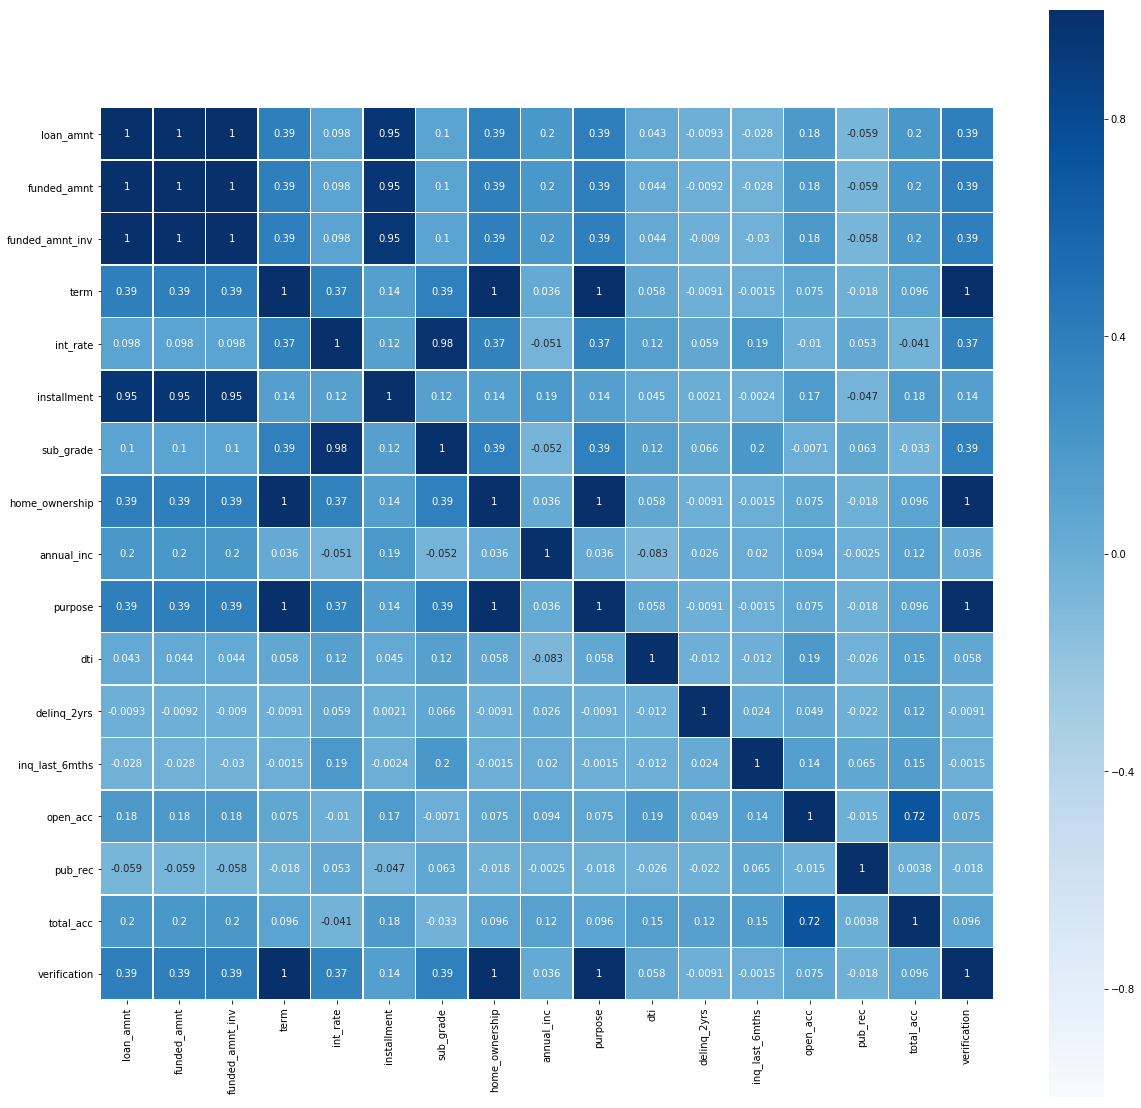

In [23]:
plt.figure(figsize=(20,20)) #ploting correlation heatmap
sns.heatmap(dataset_work.assign(
                         sub_grade=dataset_work.sub_grade.astype('category').cat.codes,
                         term=dataset_work.term.astype('category').cat.codes,
                         home_ownership=dataset_work.term.astype('category').cat.codes,
                         verification=dataset_work.term.astype('category').cat.codes,
                         purpose=dataset_work.term.astype('category').cat.codes).corr(), 
                         annot=True, cmap='Blues',vmin=-1, vmax=1, square=True, linewidths=0.5)

In [24]:
dataset_after_corr= dataset_work.drop(['funded_amnt', 'funded_amnt_inv', 'sub_grade', 'purpose', 'home_ownership', 'verification_status', 'open_acc'], axis=1)#dropping one of the two highly correlated variables

In [25]:
dataset_after_corr.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,pub_rec,total_acc
0,2500,36 months,13.56,84.92,55000.0,Current,18.24,0.0,1.0,1.0,34.0
1,30000,60 months,18.94,777.23,90000.0,Current,26.52,0.0,0.0,1.0,44.0
2,5000,36 months,17.97,180.69,59280.0,Current,10.51,0.0,0.0,0.0,13.0
3,4000,36 months,18.94,146.51,92000.0,Current,16.74,0.0,0.0,0.0,13.0
4,30000,60 months,16.14,731.78,57250.0,Current,26.35,0.0,0.0,0.0,26.0


In [26]:
term= pd.get_dummies(dataset_after_corr["term"], drop_first= True) #dummy value creation

In [27]:
df_final= dataset_after_corr.drop(["term"], axis=1)
df_final= pd.concat([df_final, term], axis=1)

In [28]:
df_final.head(5)

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,pub_rec,total_acc,60 months
0,2500,13.56,84.92,55000.0,Current,18.24,0.0,1.0,1.0,34.0,0
1,30000,18.94,777.23,90000.0,Current,26.52,0.0,0.0,1.0,44.0,1
2,5000,17.97,180.69,59280.0,Current,10.51,0.0,0.0,0.0,13.0,0
3,4000,18.94,146.51,92000.0,Current,16.74,0.0,0.0,0.0,13.0,0
4,30000,16.14,731.78,57250.0,Current,26.35,0.0,0.0,0.0,26.0,1


In [29]:
df_final = df_final[df_final.loan_status != 'Current'] # deleting rows which are not relevant for our modelling "Model Exclusion"
df_final = df_final[df_final.loan_status != 'In Grace Period']
df_final = df_final[df_final.loan_status != 'Late (16-30 days)']
df_final = df_final[df_final.loan_status != 'Late (31-120 days)']

In [30]:
df_final.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [31]:
df_final['loan_status'] = df_final['loan_status'].replace({'Charged Off':'Default', 'Does not meet the credit policy. Status:Charged Off': 'Default', 
                                                           'Does not meet the credit policy. Status:Fully Paid':'Fully Paid'}) #Categorising loan status "Default" and "Fully Paid" category

In [32]:
df_final.head(5)

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,pub_rec,total_acc,60 months
100,30000,22.35,1151.16,100000.0,Fully Paid,30.46,0.0,0.0,1.0,19.0,0
152,40000,16.14,975.71,45000.0,Fully Paid,50.53,0.0,0.0,0.0,37.0,1
170,20000,7.56,622.68,100000.0,Fully Paid,18.92,0.0,0.0,0.0,19.0,0
186,4500,11.31,147.99,38500.0,Fully Paid,4.64,0.0,0.0,0.0,25.0,0
215,8425,27.27,345.18,450000.0,Fully Paid,12.37,0.0,0.0,0.0,37.0,0


In [33]:
df_final['loan_status'].value_counts() # frequency count of each category of loan_status

Fully Paid    1043940
Default        262447
Name: loan_status, dtype: int64

In [34]:
df_final['loan_status'] = df_final['loan_status'].replace({'Fully Paid':0, 'Default': 1}) #categorising as 0 and 1

In [35]:
df_final.head(5)

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,pub_rec,total_acc,60 months
100,30000,22.35,1151.16,100000.0,0,30.46,0.0,0.0,1.0,19.0,0
152,40000,16.14,975.71,45000.0,0,50.53,0.0,0.0,0.0,37.0,1
170,20000,7.56,622.68,100000.0,0,18.92,0.0,0.0,0.0,19.0,0
186,4500,11.31,147.99,38500.0,0,4.64,0.0,0.0,0.0,25.0,0
215,8425,27.27,345.18,450000.0,0,12.37,0.0,0.0,0.0,37.0,0


# <font color = 'blue'>  Modeling** </font>

In [36]:
lr_y= df_final.iloc[:,4].values

In [37]:
lr_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
df_x= df_final.drop(['loan_status'], axis=1)

In [39]:
df_x.head(5)

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,total_acc,60 months
100,30000,22.35,1151.16,100000.0,30.46,0.0,0.0,1.0,19.0,0
152,40000,16.14,975.71,45000.0,50.53,0.0,0.0,0.0,37.0,1
170,20000,7.56,622.68,100000.0,18.92,0.0,0.0,0.0,19.0,0
186,4500,11.31,147.99,38500.0,4.64,0.0,0.0,0.0,25.0,0
215,8425,27.27,345.18,450000.0,12.37,0.0,0.0,0.0,37.0,0


In [40]:
lr_x= df_x.iloc[:,:].values

In [41]:
#train_test split
from sklearn.model_selection import train_test_split
lr_x_train, lr_x_test, lr_y_train, lr_y_test= train_test_split(lr_x, lr_y, test_size=0.25, random_state=0)

In [42]:
#Feature Scaling; min max scaling won't affect the value of our categorical variable here
scaler = MinMaxScaler(feature_range=(0, 1))
lr_x_train= scaler.fit_transform(lr_x_train)
lr_x_test= scaler.fit_transform(lr_x_test)

# <font color = 'blue'>  Logistic Regression** </font>

In [43]:
#fitting logistic regression
from sklearn.linear_model import LogisticRegression
lr_classifier= LogisticRegression(random_state=0)
lr_classifier.fit(lr_x_train, lr_y_train)

C:\Users\shive\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
#predicting
lr_y_pred_train= lr_classifier.predict(lr_x_train)
lr_y_pred_test= lr_classifier.predict(lr_x_test)

In [45]:
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
lr_cm= confusion_matrix(lr_y_test, lr_y_pred_test)

In [46]:
#calculating accuracy
lr_accuracy_train= sklearn.metrics.accuracy_score(lr_y_train, lr_y_pred_train).round(3)
lr_accuracy_test= sklearn.metrics.accuracy_score(lr_y_test, lr_y_pred_test).round(3)

In [47]:
print('lr_train_accuracy:'+ str(lr_accuracy_train) +"\n" + 'lr_test_accuracy:' + str(lr_accuracy_test))

lr_train_accuracy:0.799
lr_test_accuracy:0.798


In [48]:
print(classification_report(lr_y_train, lr_y_pred_train)) #clasification report of train data

              precision    recall  f1-score   support

           0       0.81      0.98      0.89    783142
           1       0.49      0.07      0.12    196648

    accuracy                           0.80    979790
   macro avg       0.65      0.52      0.50    979790
weighted avg       0.74      0.80      0.73    979790



In [49]:
print(classification_report(lr_y_test, lr_y_pred_test))  #clasification report of test data

              precision    recall  f1-score   support

           0       0.81      0.98      0.89    260798
           1       0.49      0.08      0.14     65799

    accuracy                           0.80    326597
   macro avg       0.65      0.53      0.51    326597
weighted avg       0.74      0.80      0.73    326597



In [50]:
# k-Fold cross validation
from sklearn.model_selection import cross_val_score
lr_accuracies= cross_val_score(estimator= lr_classifier, 
                                X= lr_x_train, 
                                y= lr_y_train,
                               cv=5)

C:\Users\shive\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shive\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shive\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shive\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shive\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [51]:
lr_accuracies.mean().round(3)

0.799

# <font color = 'blue'>  Random Forest** </font>

In [52]:
#fitting RF Classification
from sklearn.ensemble import RandomForestClassifier
rfc_classifier= RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
rfc_classifier.fit(lr_x_train, lr_y_train)
#predicting
rfc_y_pred_train= rfc_classifier.predict(lr_x_train)
rfc_y_pred_test= rfc_classifier.predict(lr_x_test)
#confusion matrix
from sklearn.metrics import confusion_matrix
rfc_cm= confusion_matrix(lr_y_test, rfc_y_pred_test)

In [53]:
rfc_accuracy_train= sklearn.metrics.accuracy_score(lr_y_train, rfc_y_pred_train).round(3)
rfc_accuracy_test= sklearn.metrics.accuracy_score(lr_y_test, rfc_y_pred_test).round(3)

In [54]:
print('rfc_train_accuracy:'+ str(rfc_accuracy_train) +"\n" + 'rfc_test_accuracy:' + str(rfc_accuracy_test))

rfc_train_accuracy:0.977
rfc_test_accuracy:0.787


In [55]:
print(classification_report(lr_y_train, rfc_y_pred_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    783142
           1       1.00      0.89      0.94    196648

    accuracy                           0.98    979790
   macro avg       0.99      0.94      0.96    979790
weighted avg       0.98      0.98      0.98    979790



In [56]:
print(classification_report(lr_y_test, rfc_y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88    260798
           1       0.38      0.09      0.14     65799

    accuracy                           0.79    326597
   macro avg       0.59      0.53      0.51    326597
weighted avg       0.72      0.79      0.73    326597



In [57]:
# k-Fold cross validation
from sklearn.model_selection import cross_val_score
rfc_accuracies= cross_val_score(estimator= rfc_classifier, 
                                X= lr_x_train, 
                                y= lr_y_train,
                               cv=5)

In [58]:
rfc_accuracies.mean().round(3)

0.788

# <font color = 'blue'>  SVM** </font>

In [ ]:
#fitting SVM regression
from sklearn.svm import SVC
svm_classifier= SVC(kernel= "rbf", random_state=0)
svm_classifier.fit(lr_x_train, lr_y_train)
#predicting
svm_y_pred_test= svm_classifier.predict(lr_x_test)
svm_y_pred_train= svm_classifier.predict(lr_x_train)
#confusion matrix
from sklearn.metrics import confusion_matrix
svm_cm= confusion_matrix(lr_y_test, svm_y_pred)

C:\Users\shive\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [72]:
svm_accuracy_train= sklearn.metrics.accuracy_score(lr_y_train, svm_y_pred_train)
svm_accuracy_test= sklearn.metrics.accuracy_score(lr_y_test, svm_y_pred_test)

NameError: name 'svm_y_pred_train' is not defined

In [ ]:
print('svm_train_accuracy:'+ str(svm_accuracy_train) +"\n" + 'svm_test_accuracy:' + str(svm_accuracy_test))

In [ ]:
print(classification_report(lr_y_train, svm_y_pred_train))

In [ ]:
print(classification_report(lr_y_test, svm_y_pred_test))

In [ ]:
# k-Fold cross validation
from sklearn.model_selection import cross_val_score
svm_accuracies= cross_val_score(estimator= svm_classifier, 
                                X= lr_x_train, 
                                y= lr_y_train,
                                cv=5)
svm_accuracies.mean()

# <font color = 'blue'>  XGBoost** </font>

In [59]:
#fitting xgboost model
from xgboost import XGBClassifier
xgb_classifier= XGBClassifier()
xgb_classifier.fit(lr_x_train, lr_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [60]:
#predicting the results
xgb_y_pred_train= xgb_classifier.predict(lr_x_train)
xgb_y_pred_test= xgb_classifier.predict(lr_x_test)
#confusion metrix
from sklearn.metrics import confusion_matrix
xgb_cm= confusion_matrix(lr_y_test, xgb_y_pred_test)

In [61]:
xgb_accuracy_train= sklearn.metrics.accuracy_score(lr_y_train, xgb_y_pred_train).round(3)
xgb_accuracy_test= sklearn.metrics.accuracy_score(lr_y_test, xgb_y_pred_test).round(3)

In [62]:
print('xgb_train_accuracy:'+ str(xgb_accuracy_train) +"\n" + 'xgb_test_accuracy:' + str(xgb_accuracy_test))

xgb_train_accuracy:0.801
xgb_test_accuracy:0.8


In [63]:
print(classification_report(lr_y_train, xgb_y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89    783142
           1       0.56      0.04      0.07    196648

    accuracy                           0.80    979790
   macro avg       0.68      0.51      0.48    979790
weighted avg       0.75      0.80      0.72    979790



In [64]:
print(classification_report(lr_y_test, xgb_y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89    260798
           1       0.55      0.03      0.05     65799

    accuracy                           0.80    326597
   macro avg       0.67      0.51      0.47    326597
weighted avg       0.75      0.80      0.72    326597



In [65]:
# k-Fold cross validation
from sklearn.model_selection import cross_val_score
xgb_accuracies= cross_val_score(estimator= xgb_classifier, 
                                X= lr_x_train, 
                                y= lr_y_train,
                                cv=5)
xgb_accuracies.mean().round(3)

0.801

In [ ]:
#applying Grid Search
from sklearn.model_selection import GridSearchCV
parameters= [
             {"learning_rate": [0.05, 0.1, 0.15,0.20, 0.25], "gamma": [0.0, 0.1, 0.2,0.3,0.4,0.5,0.6], 
              "max_depth": [2,3,4,5,6]}
            ]
grid_search= GridSearchCV(estimator= xgb_classifier,
                          param_grid= parameters,
                          scoring= "accuracy",
                          cv=2,
                          n_jobs= -1)
grid_search= grid_search.fit(lr_x_train, lr_y_train)
best_accuracy= grid_search.best_score_
best_parameters= grid_search.best_params_